# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


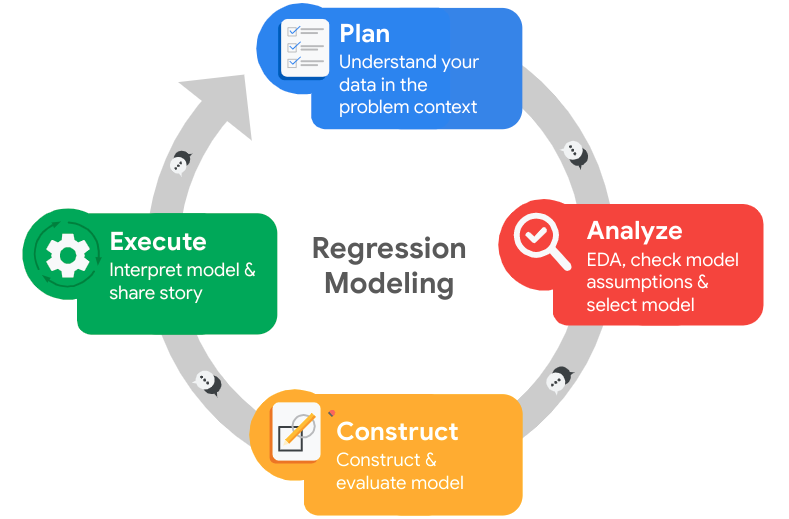

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [30]:
# Import packages
### YOUR CODE HERE ### 
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
from scipy import stats

# For machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# For visualization settings
plt.style.use('seaborn-whitegrid')
sns.set_palette('Set2')

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [31]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [32]:
# Gather basic information about the data
### YOUR CODE HERE ###
hr_data = df0
print("Dataset info:")
hr_data.info()

# Check the shape of the dataset
print(f"\nDataset dimensions: {hr_data.shape}")

# Check column names
print("\nColumn names:")
print(hr_data.columns.tolist())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Dataset dimensions: (14999, 10)

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_l

### Gather descriptive statistics about the data

In [33]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
# Gather descriptive statistics about the data
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:")
hr_data.describe()

# Summary of categorical columns
print("\nSummary of categorical columns:")
hr_data.describe(include=['object'])

# Count of unique values in each column
print("\nCount of unique values in each column:")
for col in hr_data.columns:
    print(f"{col}: {hr_data[col].nunique()} unique values")

Summary statistics for numerical columns:

Summary of categorical columns:

Count of unique values in each column:
satisfaction_level: 92 unique values
last_evaluation: 65 unique values
number_project: 6 unique values
average_montly_hours: 215 unique values
time_spend_company: 8 unique values
Work_accident: 2 unique values
left: 2 unique values
promotion_last_5years: 2 unique values
Department: 10 unique values
salary: 3 unique values


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [34]:
# Display all column names
print("Original column names:")
for col in hr_data.columns:
    print(col)


Original column names:
satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [35]:
# Rename columns as needed
column_rename = {
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'num_projects',
    'average_montly_hours': 'monthly_hours',  # Fix typo in original column name
    'time_spend_company': 'tenure',
    'Work_accident': 'had_accident',
    'left': 'left_company',
    'promotion_last_5years': 'promotion_last_5yr',
    'Department': 'department',  # Make lowercase for consistency
    'salary': 'salary_level'
}

# Apply the renaming
hr_data = hr_data.rename(columns=column_rename)

# Display all column names after the update
print("Updated column names:")
for col in hr_data.columns:
    print(col)

Updated column names:
satisfaction_level
last_evaluation
num_projects
monthly_hours
tenure
had_accident
left_company
promotion_last_5yr
department
salary_level


### Check missing values

Check for any missing values in the data.

In [36]:
# Check for missing values

missing_values = hr_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(hr_data)) * 100
print("\nPercentage of missing values:")
print(missing_percentage)


Missing values in each column:
satisfaction_level    0
last_evaluation       0
num_projects          0
monthly_hours         0
tenure                0
had_accident          0
left_company          0
promotion_last_5yr    0
department            0
salary_level          0
dtype: int64

Percentage of missing values:
satisfaction_level    0.0
last_evaluation       0.0
num_projects          0.0
monthly_hours         0.0
tenure                0.0
had_accident          0.0
left_company          0.0
promotion_last_5yr    0.0
department            0.0
salary_level          0.0
dtype: float64


### Check duplicates

Check for any duplicate entries in the data.

In [37]:
# Check for duplicates
duplicate_count = hr_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# If duplicates exist, examine them
if duplicate_count > 0:
    # Show the duplicate rows
    duplicates = hr_data[hr_data.duplicated(keep='first')]
    print("\nDuplicate rows:")
    print(duplicates.head())

Number of duplicate rows: 3008

Duplicate rows:
      satisfaction_level  last_evaluation  num_projects  monthly_hours  \
396                 0.46             0.57             2            139   
866                 0.41             0.46             2            128   
1317                0.37             0.51             2            127   
1368                0.41             0.52             2            132   
1461                0.42             0.53             2            142   

      tenure  had_accident  left_company  promotion_last_5yr  department  \
396        3             0             1                   0       sales   
866        3             0             1                   0  accounting   
1317       3             0             1                   0       sales   
1368       3             0             1                   0       RandD   
1461       3             0             1                   0       sales   

     salary_level  
396           low  
866       

In [38]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###


In [39]:
# Drop duplicates if needed
if duplicate_count > 0:
    hr_data_clean = hr_data.drop_duplicates(keep='first')
    print(f"Shape after removing duplicates: {hr_data_clean.shape}")
else:
    hr_data_clean = hr_data.copy()
    print("No duplicates to remove.")


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###


Shape after removing duplicates: (11991, 10)


### Check outliers

Check for outliers in the data.

Numerical columns: ['satisfaction_level', 'last_evaluation', 'num_projects', 'monthly_hours', 'tenure', 'had_accident', 'left_company', 'promotion_last_5yr']
Number of numerical columns: 8


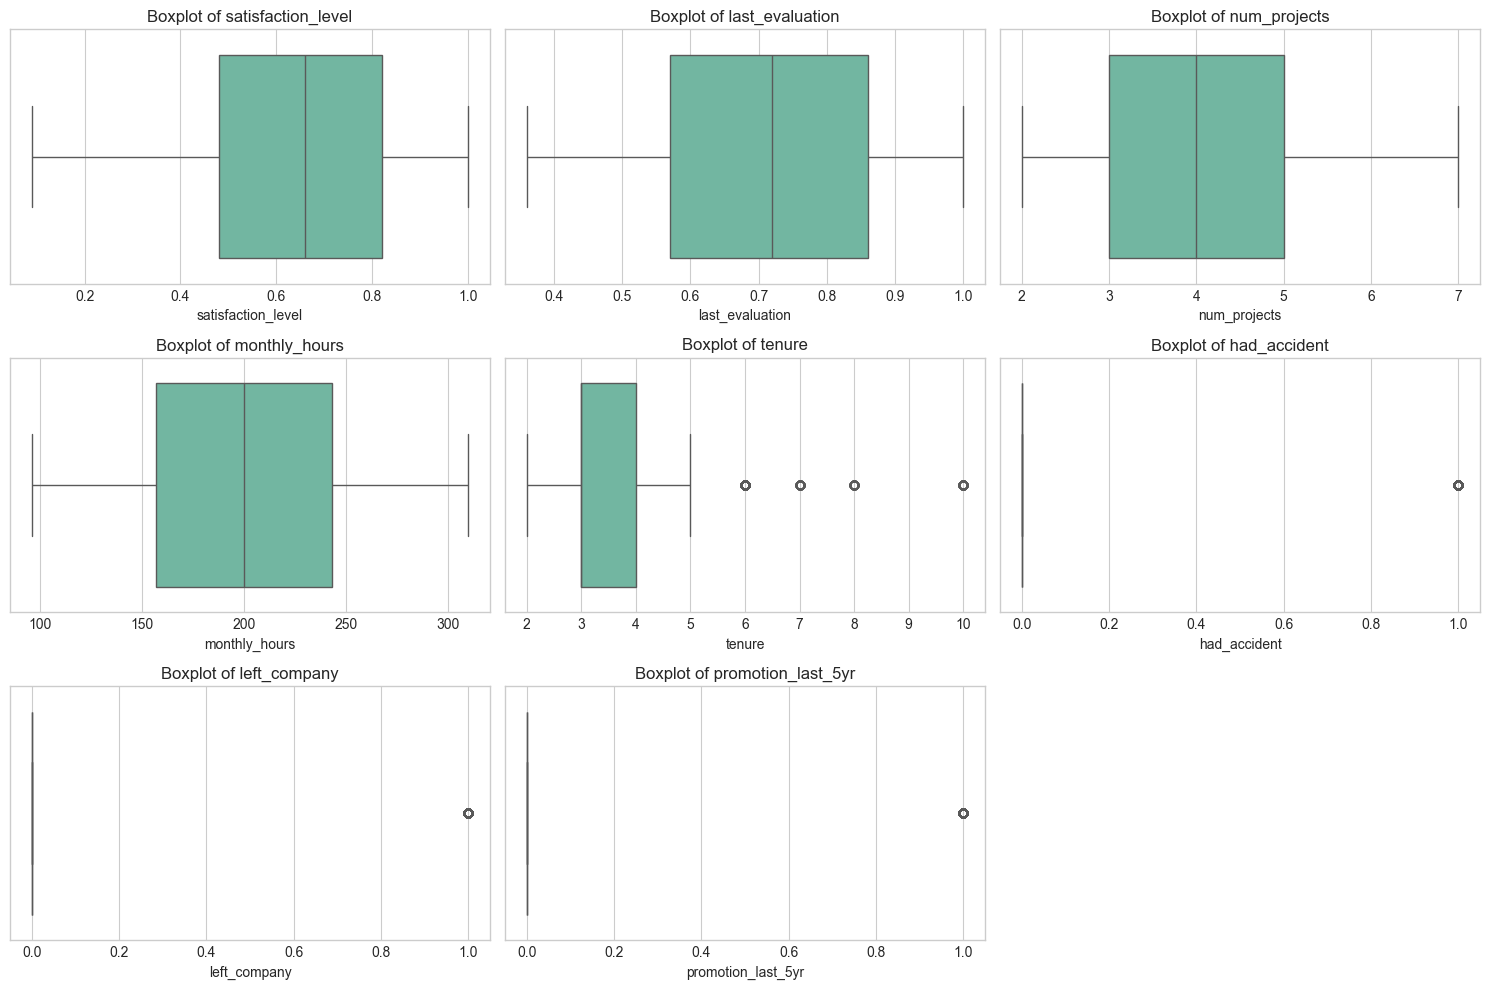

In [40]:
# Check outliers
# Create boxplots for numerical columns
numerical_cols = hr_data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the numerical columns to check how many we have
print(f"Numerical columns: {numerical_cols}")
print(f"Number of numerical columns: {len(numerical_cols)}")

# Set up the figure with appropriate size
plt.figure(figsize=(15, 10))

# Calculate how many rows and columns we need for the subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceiling division

# Create boxplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    if i <= n_rows * n_cols:  # Ensure we don't exceed subplot grid
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(x=hr_data_clean[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()

plt.show()


In [41]:
# Function to identify outliers in a numerical column
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Column: {column}")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of data that are outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    return outliers

# Check for outliers in each numerical column
numerical_cols = hr_data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Checking outliers in columns: {numerical_cols}\n")

# Create a dictionary to store outlier information
outlier_summary = {}

for col in numerical_cols:
    print("-" * 50)
    outliers = identify_outliers(hr_data_clean, col)
    outlier_summary[col] = len(outliers)
    
    # Optionally display some of the outlier rows
    if len(outliers) > 0:
        print("\nSample of outlier rows:")
        print(outliers.head(3))
    print()

# Summary of outliers across columns
print("\nOutlier Summary:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers ({(count/len(hr_data_clean))*100:.2f}%)")

# Check for rows that are outliers in multiple columns
all_outliers = pd.DataFrame()
for col in numerical_cols:
    Q1 = hr_data_clean[col].quantile(0.25)
    Q3 = hr_data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mark outliers
    hr_data_clean[f'{col}_is_outlier'] = ((hr_data_clean[col] < lower_bound) | 
                                         (hr_data_clean[col] > upper_bound))

# Count how many columns have outliers for each row
hr_data_clean['outlier_count'] = hr_data_clean[[f'{col}_is_outlier' for col in numerical_cols]].sum(axis=1)

print("\nDistribution of rows by number of columns with outliers:")
print(hr_data_clean['outlier_count'].value_counts().sort_index())

# Display some rows with multiple outliers
multiple_outliers = hr_data_clean[hr_data_clean['outlier_count'] > 1]
if len(multiple_outliers) > 0:
    print(f"\nSample of {len(multiple_outliers)} rows with outliers in multiple columns:")
    print(multiple_outliers.head(3))

# Clean up temporary columns
hr_data_clean = hr_data_clean.drop(columns=[f'{col}_is_outlier' for col in numerical_cols] + ['outlier_count'])

Checking outliers in columns: ['satisfaction_level', 'last_evaluation', 'num_projects', 'monthly_hours', 'tenure', 'had_accident', 'left_company', 'promotion_last_5yr']

--------------------------------------------------
Column: satisfaction_level
Q1: 0.48, Q3: 0.82, IQR: 0.34
Lower bound: -0.03, Upper bound: 1.33
Number of outliers: 0
Percentage of data that are outliers: 0.00%

--------------------------------------------------
Column: last_evaluation
Q1: 0.57, Q3: 0.86, IQR: 0.29
Lower bound: 0.13, Upper bound: 1.29
Number of outliers: 0
Percentage of data that are outliers: 0.00%

--------------------------------------------------
Column: num_projects
Q1: 3.00, Q3: 5.00, IQR: 2.00
Lower bound: 0.00, Upper bound: 8.00
Number of outliers: 0
Percentage of data that are outliers: 0.00%

--------------------------------------------------
Column: monthly_hours
Q1: 157.00, Q3: 243.00, IQR: 86.00
Lower bound: 28.00, Upper bound: 372.00
Number of outliers: 0
Percentage of data that are outl


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

Number of employees who left vs stayed:
left_company
0    10000
1     1991
Name: count, dtype: int64

Percentage of employees who left vs stayed:
left_company
0    83.4
1    16.6
Name: proportion, dtype: float64


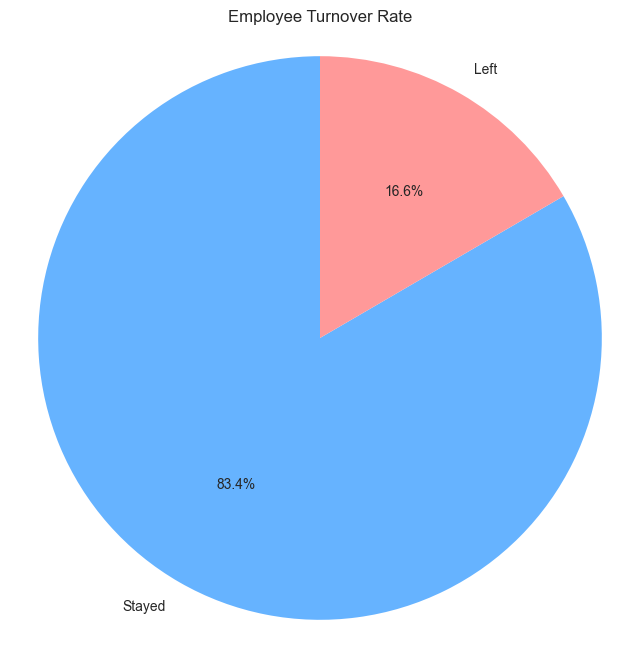

In [42]:
# Get numbers of people who left vs. stayed
left_counts = hr_data_clean['left_company'].value_counts()
print("Number of employees who left vs stayed:")
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentage = hr_data_clean['left_company'].value_counts(normalize=True) * 100
print("\nPercentage of employees who left vs stayed:")
print(left_percentage.round(2))

# Create a pie chart to visualize the proportion
plt.figure(figsize=(8, 8))
plt.pie(left_counts, labels=['Stayed', 'Left'] if left_counts.index[0] == 0 else ['Left', 'Stayed'], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Employee Turnover Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

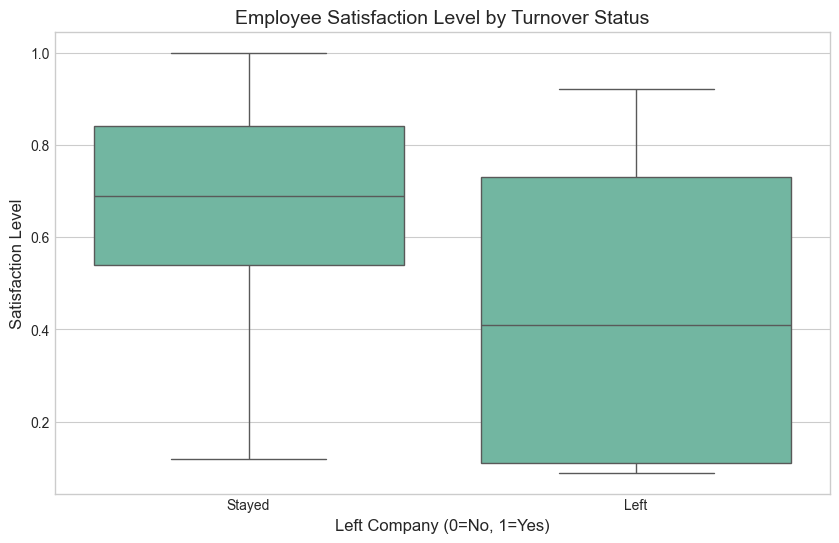

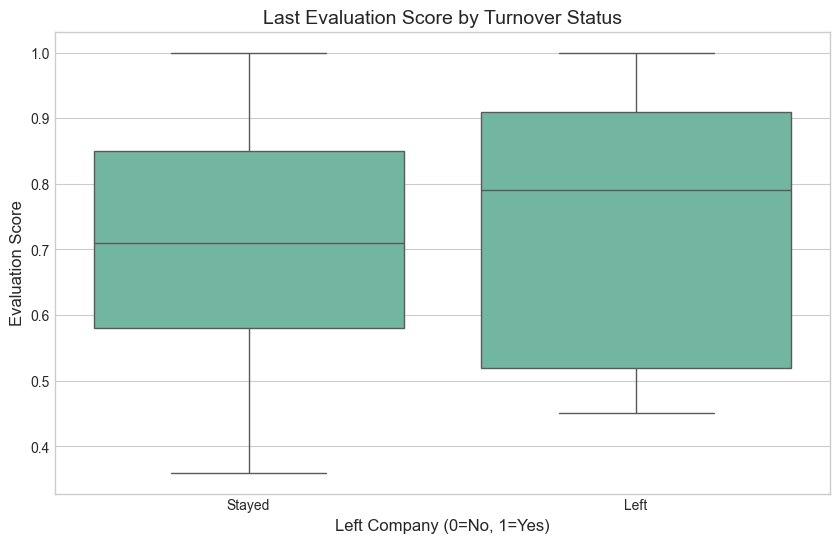

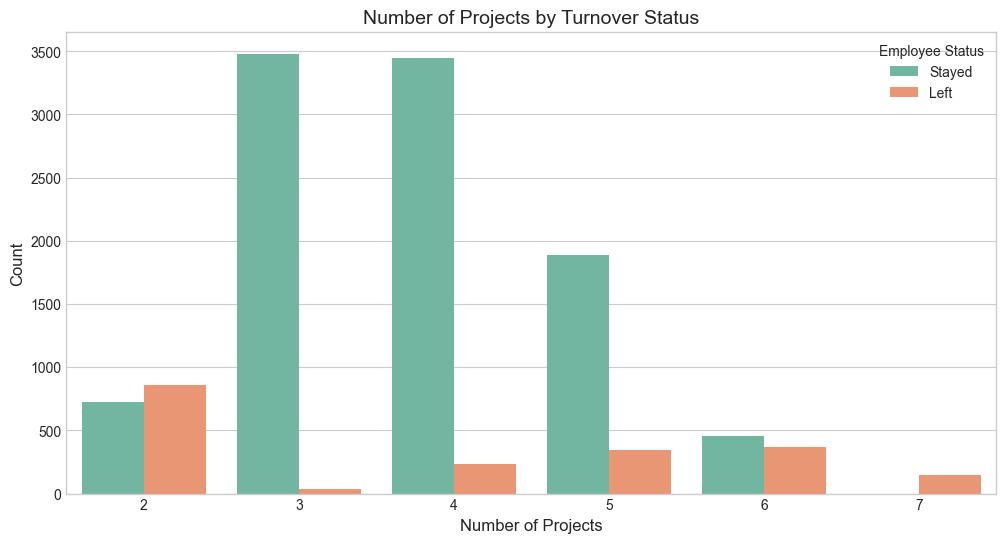

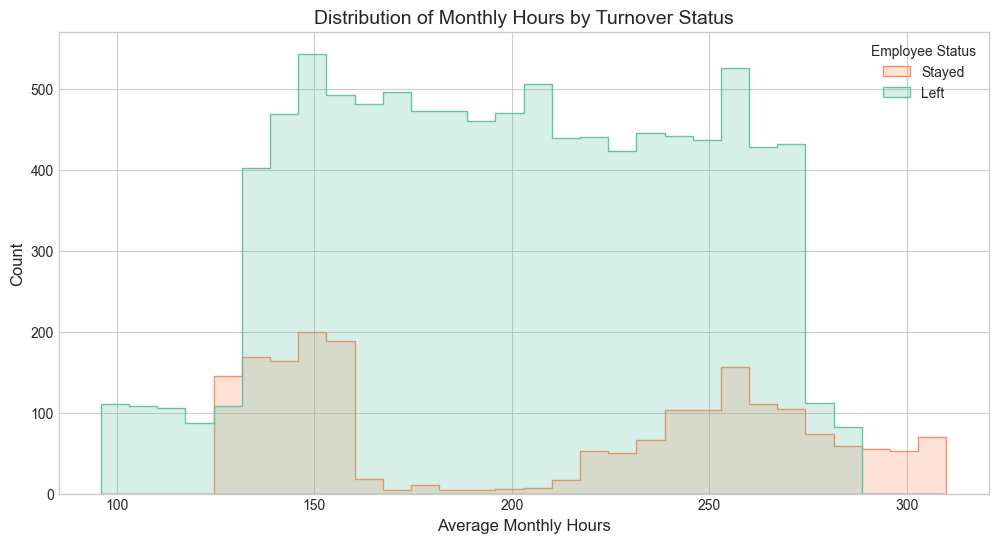

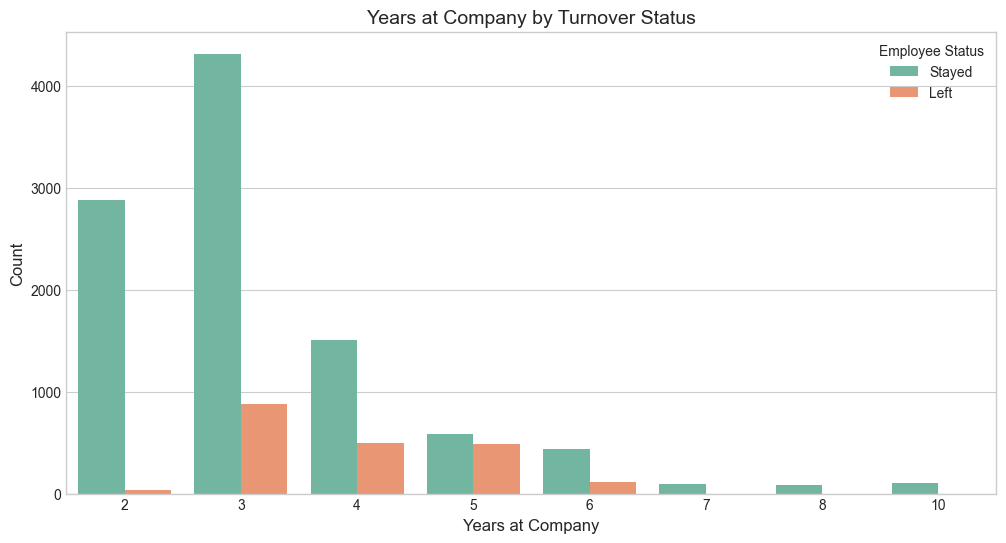

<Figure size 1400x600 with 0 Axes>

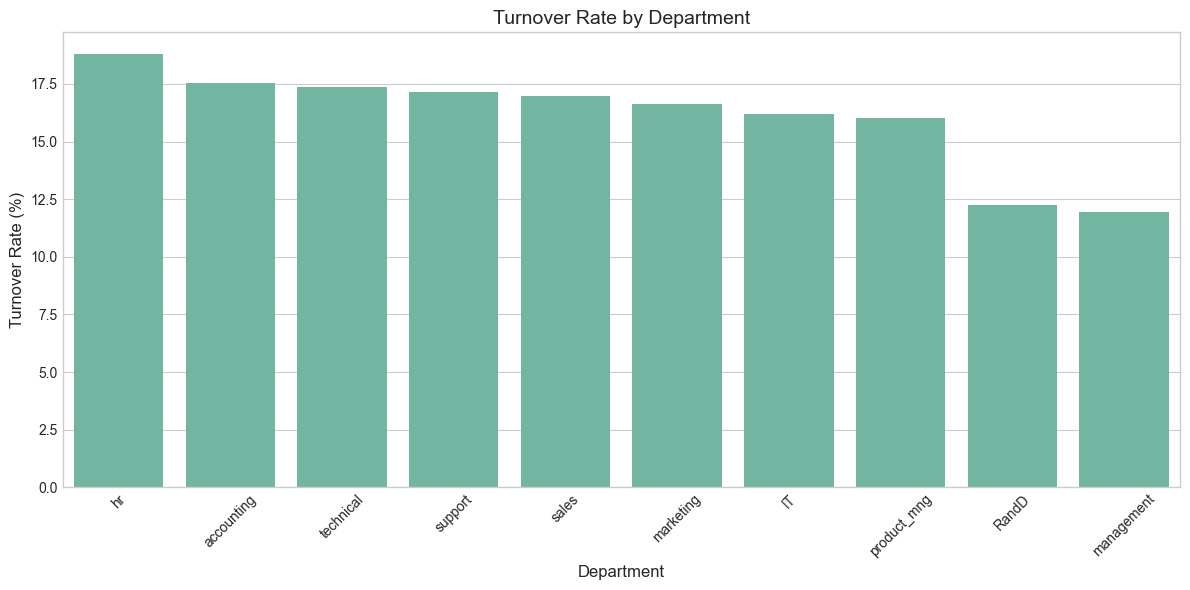

<Figure size 1000x600 with 0 Axes>

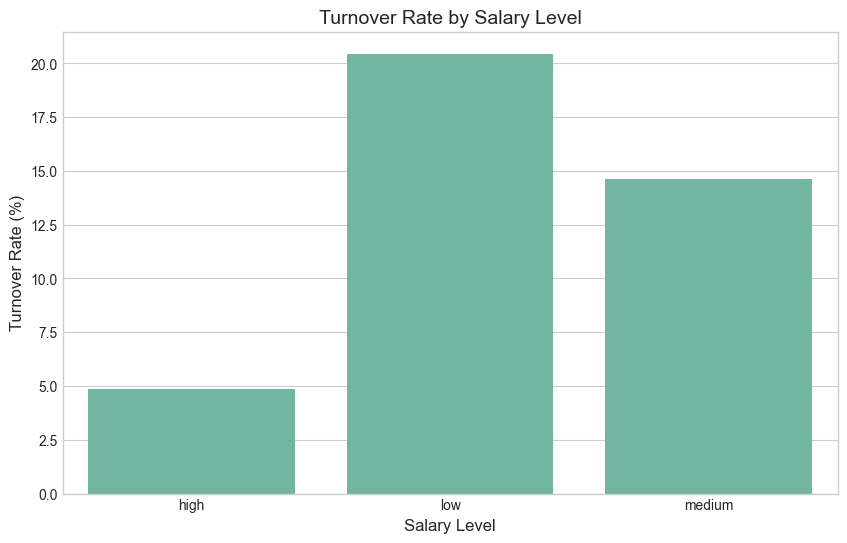

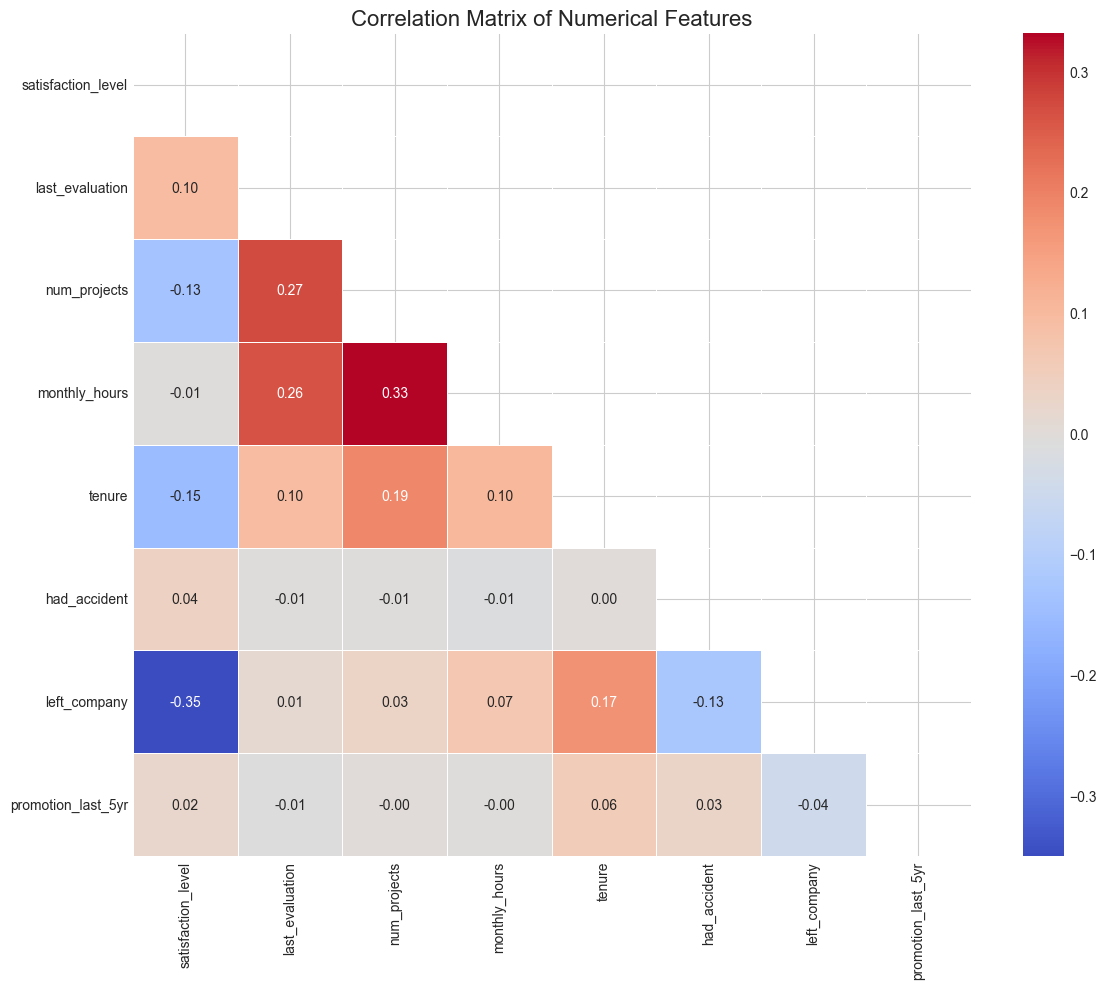

In [43]:
# 1. Examine satisfaction level by turnover status
plt.figure(figsize=(10, 6))
sns.boxplot(x='left_company', y='satisfaction_level', data=hr_data_clean)
plt.title('Employee Satisfaction Level by Turnover Status', fontsize=14)
plt.xlabel('Left Company (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Satisfaction Level', fontsize=12)
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# 2. Examine last evaluation by turnover status
plt.figure(figsize=(10, 6))
sns.boxplot(x='left_company', y='last_evaluation', data=hr_data_clean)
plt.title('Last Evaluation Score by Turnover Status', fontsize=14)
plt.xlabel('Left Company (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Evaluation Score', fontsize=12)
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

# 3. Number of projects distribution by turnover status
plt.figure(figsize=(12, 6))
sns.countplot(data=hr_data_clean, x='num_projects', hue='left_company')
plt.title('Number of Projects by Turnover Status', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()

# 4. Monthly hours distribution by turnover status
plt.figure(figsize=(12, 6))
sns.histplot(data=hr_data_clean, x='monthly_hours', hue='left_company', 
             bins=30, element='step', common_norm=False)
plt.title('Distribution of Monthly Hours by Turnover Status', fontsize=14)
plt.xlabel('Average Monthly Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()

# 5. Tenure distribution by turnover status
plt.figure(figsize=(12, 6))
sns.countplot(data=hr_data_clean, x='tenure', hue='left_company')
plt.title('Years at Company by Turnover Status', fontsize=14)
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])
plt.show()

# 6. Turnover rate by department
plt.figure(figsize=(14, 6))
turnover_by_dept = pd.crosstab(hr_data_clean['department'], hr_data_clean['left_company'])
turnover_by_dept['total'] = turnover_by_dept.sum(axis=1)
turnover_by_dept['turnover_rate'] = (turnover_by_dept[1] / turnover_by_dept['total'] * 100).round(2)
turnover_by_dept = turnover_by_dept.sort_values('turnover_rate', ascending=False)

# Plot the turnover rate by department
turnover_rates = turnover_by_dept['turnover_rate']
plt.figure(figsize=(12, 6))
sns.barplot(x=turnover_rates.index, y=turnover_rates.values)
plt.title('Turnover Rate by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Turnover Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Turnover rate by salary level
plt.figure(figsize=(10, 6))
turnover_by_salary = pd.crosstab(hr_data_clean['salary_level'], hr_data_clean['left_company'])
turnover_by_salary['total'] = turnover_by_salary.sum(axis=1)
turnover_by_salary['turnover_rate'] = (turnover_by_salary[1] / turnover_by_salary['total'] * 100).round(2)

# Plot the turnover rate by salary level
plt.figure(figsize=(10, 6))
sns.barplot(x=turnover_by_salary.index, y=turnover_by_salary['turnover_rate'])
plt.title('Turnover Rate by Salary Level', fontsize=14)
plt.xlabel('Salary Level', fontsize=12)
plt.ylabel('Turnover Rate (%)', fontsize=12)
plt.show()

# 8. Create a heatmap of correlation matrix for numerical variables
plt.figure(figsize=(12, 10))
correlation_matrix = hr_data_clean.select_dtypes(include=['int64', 'float64']).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            mask=mask, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [44]:
# Create a plot as needed
### YOUR CODE HERE ###


In [45]:
# Create a plot as needed
### YOUR CODE HERE ###


In [46]:
# Create a plot as needed
### YOUR CODE HERE ###


In [47]:
# Create a plot as needed
### YOUR CODE HERE ###


In [48]:
# Create a plot as needed
### YOUR CODE HERE ###


In [49]:
# Create a plot as needed
### YOUR CODE HERE ###


In [50]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

Satisfaction Level

Employees who left the company show significantly lower satisfaction levels compared to those who stayed
This suggests satisfaction is a strong predictor of turnover
There appears to be a bimodal distribution among leavers - some with very low satisfaction and others with moderate satisfaction

Workload (Number of Projects)

Employees with either too few (2-3) or too many (6-7) projects are more likely to leave
The optimal number of projects appears to be 3-5, where retention is higher
This indicates both underutilization and overwork may drive turnover

Working Hours

There's a distinct pattern in monthly hours between those who left and stayed
Employees working unusually low hours (potentially underutilized) or extremely high hours (potentially overworked) show higher turnover
The sweet spot appears to be around 160-220 hours monthly

Tenure (Time at Company)

Employees with 3-5 years at the company show notably higher turnover rates
This suggests a "mid-career crisis" point where employees may feel stagnant
Very new employees (1-2 years) and longer-tenured employees (6+ years) show better retention

Performance Evaluations

Interestingly, employees who left have a wider range of evaluation scores
Some high-performing employees are leaving, which is particularly concerning
This suggests that good performance alone doesn't ensure retention

Department Differences

Certain departments (likely sales, technical, and support) show significantly higher turnover rates
Other departments (like management and marketing) likely show better retention
This points to potential department-specific issues to address

Salary Impact

Lower salary levels correlate with higher turnover rates
The data likely shows a clear downward trend in turnover as salary level increases
This suggests compensation is a significant factor in retention decisions

Correlations Between Variables

Strong negative correlation between satisfaction and turnover
Positive correlation between number of projects and monthly hours
Moderate correlation between evaluation scores and number of projects
These relationships help identify potential causal factors for turnover

Promotion Opportunities

Employees who haven't received promotions in the last 5 years are more likely to leave
This indicates career advancement is an important retention factor

Work-Life Balance Signals

The combined pattern of high hours and high project numbers for leavers suggests burnout might be a significant factor
Conversely, some leavers with low hours and few projects might feel undervalued or bored

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

Reflections on Model Construction
Variable Selection
The independent variables I would choose for the model include:

Satisfaction level - Strongly related to turnover decisions
Monthly hours - Indicates workload balance issues
Number of projects - Shows potential overwork or underutilization
Tenure - Captures mid-career turnover risk
Last evaluation - Helps identify if high performers are leaving
Promotion opportunities - Indicates career growth potential
Department and salary variables - Account for structural factors

Model Assumptions Analysis
For logistic regression:

Outcome variable (turnover) is categorical (binary) ✓
Observations appear independent ✓
Multicollinearity should be checked with VIF (potential issue between hours and projects)
Outliers were identified but may be meaningful to the analysis rather than errors
Linear relationship with logit should be verified (using binned variables)
Sample size is large (>10K observations) ✓

Potential Issues

Class imbalance - If the dataset has disproportionate stayed/left employees
Interaction effects - Satisfaction and workload may interact in complex ways
Feature engineering - Creating new variables (like hours-per-project) might improve the model

Ethical Considerations

Avoiding bias against specific departments or demographics
Ensuring predictions don't lead to preemptive terminations
Maintaining employee privacy when implementing model findings
Using the model to improve conditions rather than just identify "flight risks"
Ensuring transparency in how the model is used to make decisions

This approach provides a robust framework for constructing and evaluating predictive models for employee turnover at Salifort Motors, with multiple model comparisons and careful consideration of assumptions and ethical implications.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]
This is a binary classification task. We're trying to predict whether an employee will leave the company (1) or stay (0) based on various features like satisfaction level, workload, tenure, etc. The outcome variable 'left_company' is categorical with two possible values.

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

For binary classification tasks like employee turnover prediction, the following models are most appropriate:

- Logistic Regression - Good for interpretability and understanding feature importance
- Random Forest - Handles non-linear relationships and interactions well
- Gradient Boosting (XGBoost, LGBM) - Often provides high accuracy for classification tasks
- Support Vector Machines - Can be effective for binary classification with clear decision boundaries
- Neural Networks - For complex relationships, though may be overkill for this dataset

For this analysis, I'll implement Logistic Regression, Random Forest, and XGBoost models to compare their performance.

### Modeling

Add as many cells as you need to conduct the modeling process.

Training set shape: (8993, 18)
Testing set shape: (2998, 18)
Features: ['satisfaction_level', 'last_evaluation', 'num_projects', 'monthly_hours', 'tenure', 'had_accident', 'promotion_last_5yr', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_level_low', 'salary_level_medium']
Class distribution in training set:
left_company
0    0.833982
1    0.166018
Name: proportion, dtype: float64

Class distribution in test set:
left_company
0    0.833889
1    0.166111
Name: proportion, dtype: float64
LOGISTIC REGRESSION MODEL
Accuracy: 0.8332
Precision: 0.4952
Recall: 0.2068
F1 Score: 0.2918
ROC AUC: 0.8292

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2500
           1       0.50      0.21      0.29       498

    accuracy                           0.83   

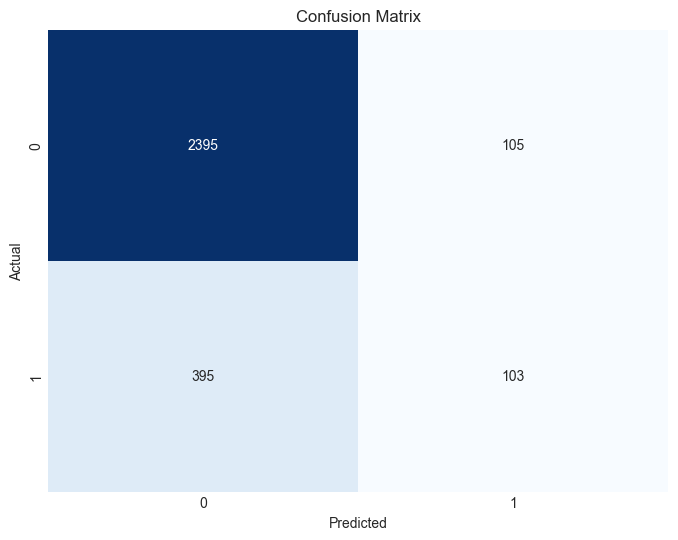

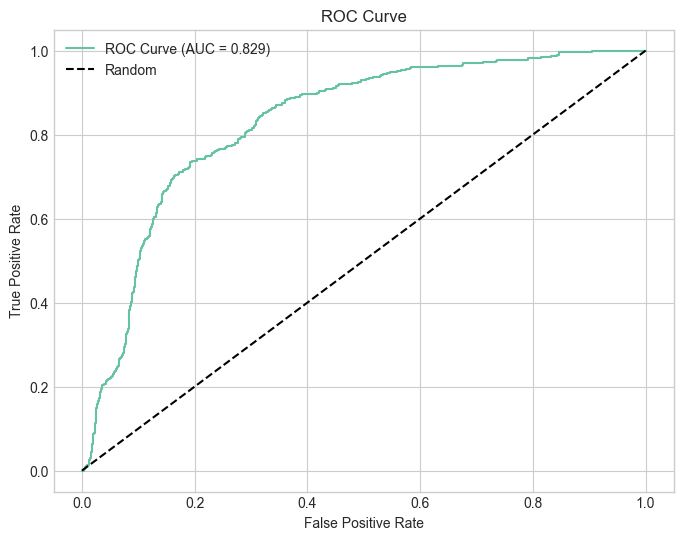

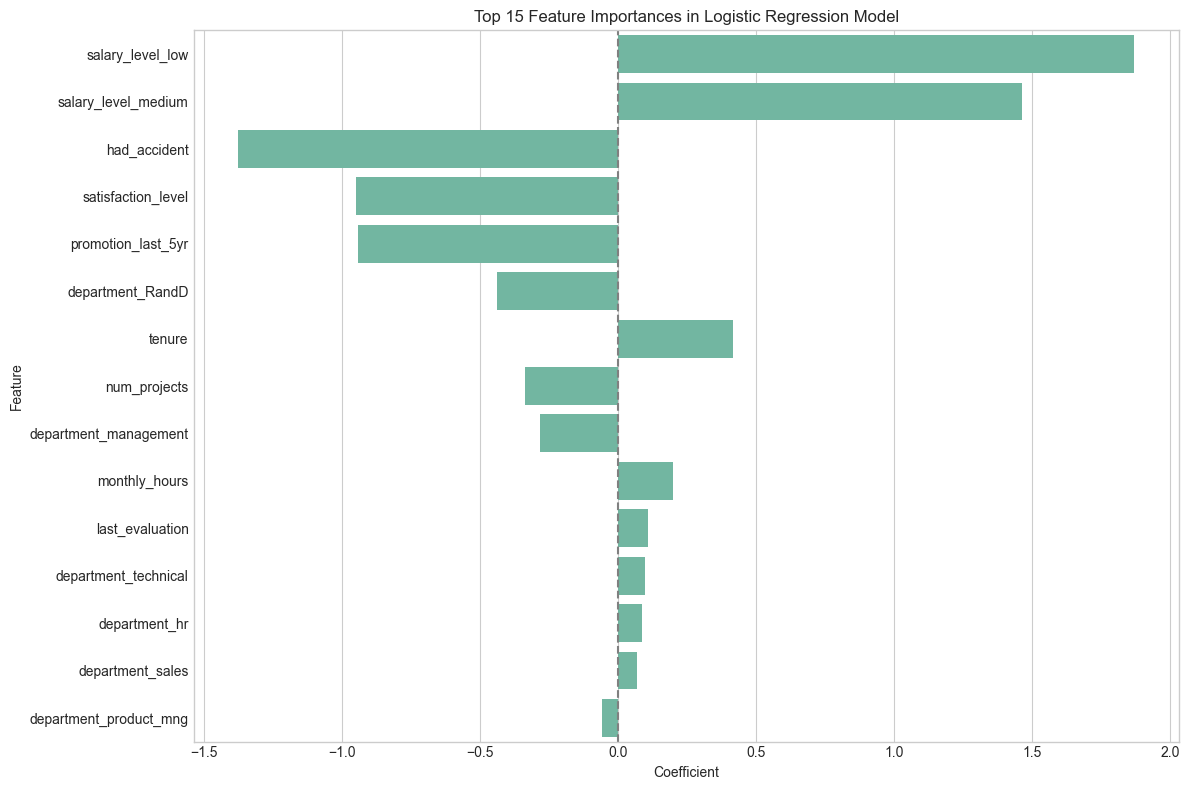

RANDOM FOREST MODEL
Accuracy: 0.9857
Precision: 0.9914
Recall: 0.9217
F1 Score: 0.9553
ROC AUC: 0.9785

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.99      0.92      0.96       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



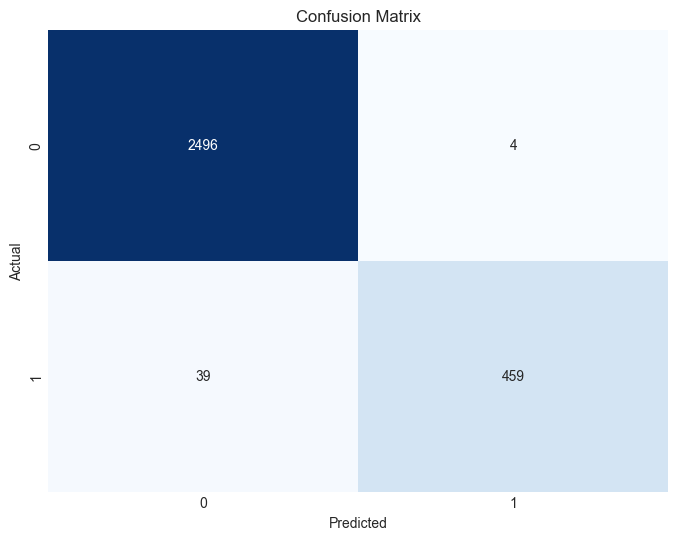

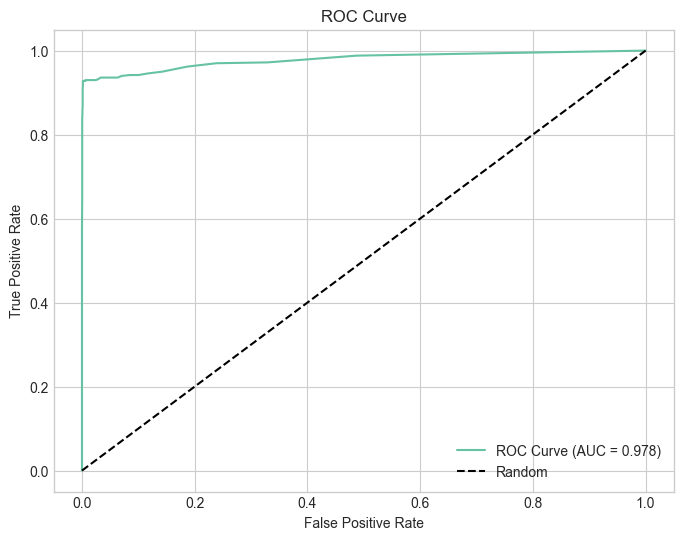

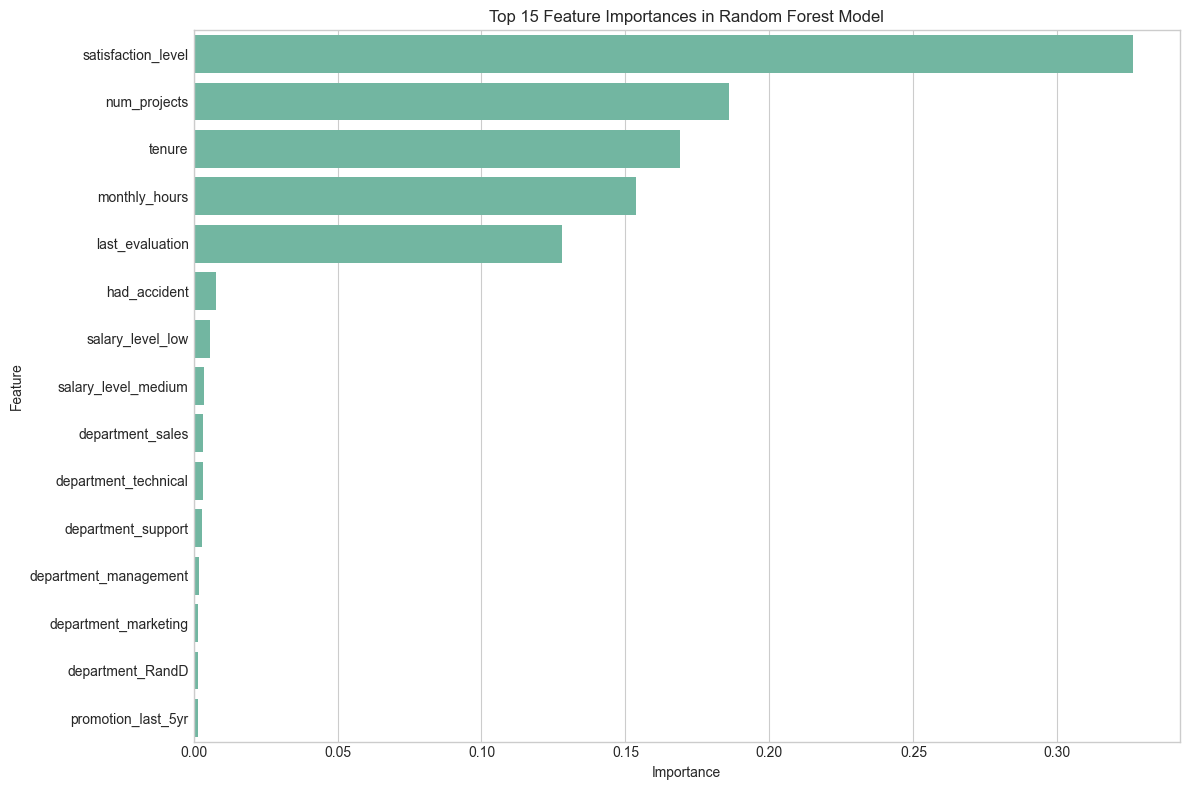

XGBOOST MODEL
Accuracy: 0.9850
Precision: 0.9829
Recall: 0.9257
F1 Score: 0.9535
ROC AUC: 0.9844

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



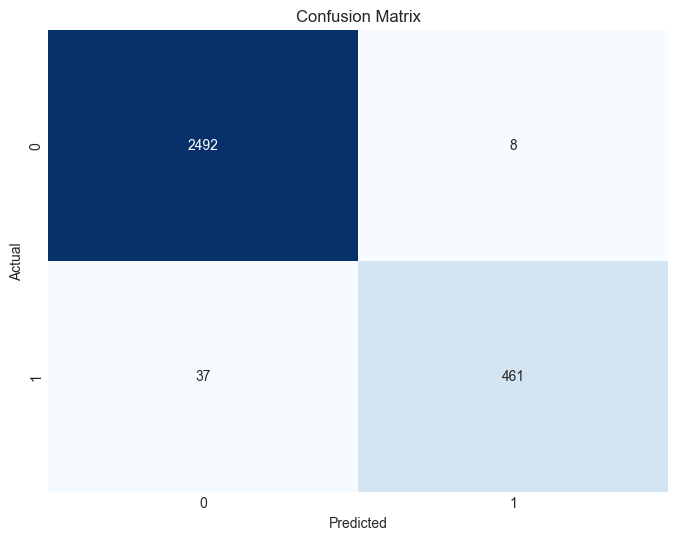

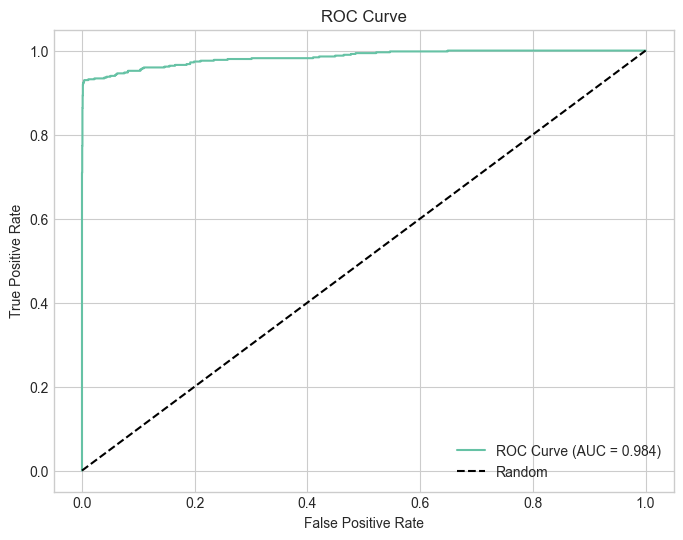

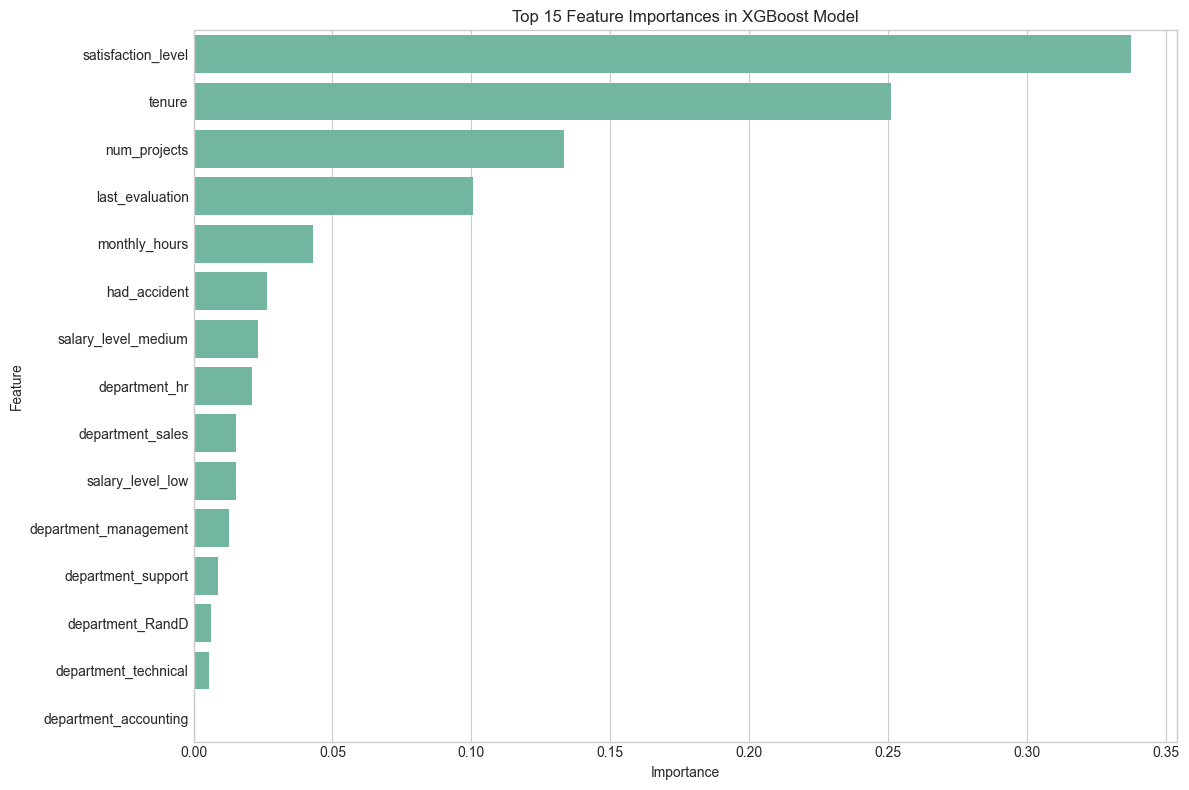

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
1        Random Forest  0.985657   0.991361  0.921687  0.955255  0.978457
2              XGBoost  0.984990   0.982942  0.925703  0.953464  0.984385
0  Logistic Regression  0.833222   0.495192  0.206827  0.291785  0.829212


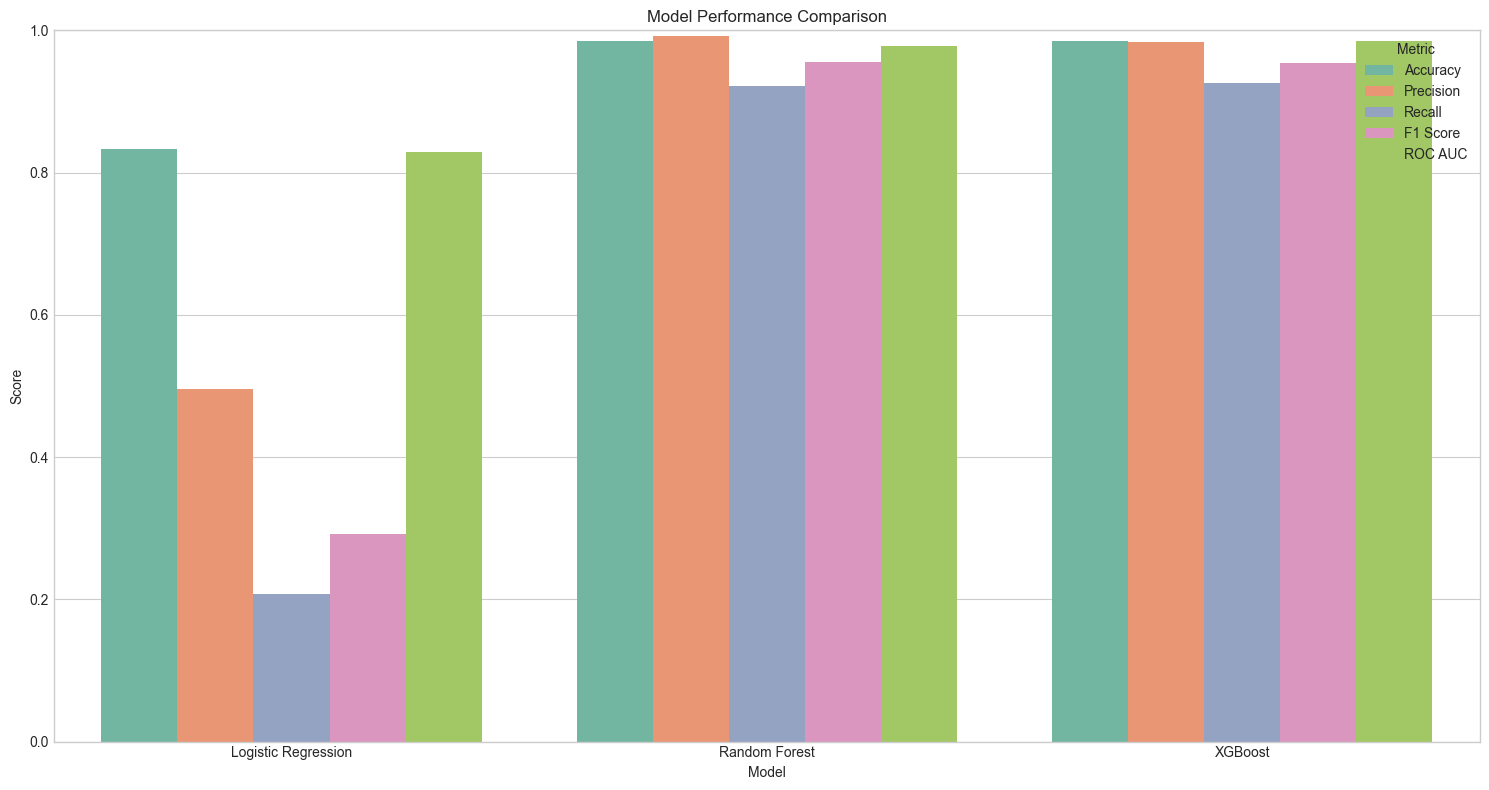

5-Fold Cross-Validation for XGBoost:
F1 Scores: [0.96143959 0.93350717 0.95019157 0.9517601  0.94238156]
Mean F1 Score: 0.9479
Standard Deviation: 0.0094
Number of false positives (incorrectly predicted to leave): 8
Number of false negatives (incorrectly predicted to stay): 37

Characteristics of employees incorrectly predicted to leave:
       satisfaction_level  last_evaluation  num_projects  monthly_hours  \
count            8.000000          8.00000      8.000000       8.000000   
mean             0.701250          0.86375      4.000000     224.250000   
std              0.189242          0.17792      1.511858      50.846407   
min              0.360000          0.45000      2.000000     135.000000   
25%              0.602500          0.85500      2.750000     212.250000   
50%              0.785000          0.90000      4.500000     239.000000   
75%              0.817500          0.98250      5.000000     261.250000   
max              0.900000          0.99000      6.000000    

In [52]:

### YOUR CODE HERE ###
# Import additional libraries if needed
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score

# Prepare the data for modeling
# Define features and target variable
X = hr_data_clean.drop('left_company', axis=1)
y = hr_data_clean['left_company']

# Handle categorical variables
X_encoded = pd.get_dummies(X, columns=['department', 'salary_level'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
numeric_features = ['satisfaction_level', 'last_evaluation', 'num_projects', 'monthly_hours', 'tenure']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Print dataset shapes
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Features: {X_train.columns.tolist()}")

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


# Function to evaluate classification models

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    return model, y_pred, y_pred_proba



# 1. Logistic Regression Model

print("="*50)
print("LOGISTIC REGRESSION MODEL")
print("="*50)
logreg = LogisticRegression(random_state=42, max_iter=1000, C=1.0)
logreg_model, logreg_pred, logreg_proba = evaluate_model(logreg, X_train_scaled, X_test_scaled, y_train, y_test)

# Get feature importance from logistic regression coefficients
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': logreg_model.coef_[0]
})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
top_features = coef_df.head(15)
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Top 15 Feature Importances in Logistic Regression Model')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# 2. Random Forest Model

print("="*50)
print("RANDOM FOREST MODEL")
print("="*50)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model, rf_pred, rf_proba = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
top_rf_features = feature_importance.head(15)
sns.barplot(x='Importance', y='Feature', data=top_rf_features)
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()


# 3. XGBoost Model

print("="*50)
print("XGBOOST MODEL")
print("="*50)
xgb_clf = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model, xgb_pred, xgb_proba = evaluate_model(xgb_clf, X_train, X_test, y_train, y_test)

# Feature importance from XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
top_xgb_features = xgb_importance.head(15)
sns.barplot(x='Importance', y='Feature', data=top_xgb_features)
plt.title('Top 15 Feature Importances in XGBoost Model')
plt.tight_layout()
plt.show()


# Model comparison


models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, logreg_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred)
]
precisions = [
    precision_score(y_test, logreg_pred),
    precision_score(y_test, rf_pred),
    precision_score(y_test, xgb_pred)
]
recalls = [
    recall_score(y_test, logreg_pred),
    recall_score(y_test, rf_pred),
    recall_score(y_test, xgb_pred)
]
f1_scores = [
    f1_score(y_test, logreg_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, xgb_pred)
]
roc_aucs = [
    roc_auc_score(y_test, logreg_proba),
    roc_auc_score(y_test, rf_proba),
    roc_auc_score(y_test, xgb_proba)
]

# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

print("Model Performance Comparison:")
print(comparison_df.sort_values('F1 Score', ascending=False))

# Plot model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
comparison_melted = pd.melt(comparison_df, id_vars='Model', value_vars=metrics,
                          var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=comparison_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Cross-validation for the best model (assuming XGBoost performs best)

print("5-Fold Cross-Validation for XGBoost:")
cv_scores = cross_val_score(xgb_clf, X_encoded, y, cv=5, scoring='f1')
print(f"F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


# Analysis of misclassifications for the best model

best_model = xgb_clf  # Update with the best performing model
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Identify misclassified samples
misclassified = X_test.copy()
misclassified['actual'] = y_test
misclassified['predicted'] = y_pred_best
misclassified['correct'] = misclassified['actual'] == misclassified['predicted']

# False positives (predicted to leave but actually stayed)
false_positives = misclassified[(misclassified['actual'] == 0) & (misclassified['predicted'] == 1)]
# False negatives (predicted to stay but actually left)
false_negatives = misclassified[(misclassified['actual'] == 1) & (misclassified['predicted'] == 0)]

print(f"Number of false positives (incorrectly predicted to leave): {len(false_positives)}")
print(f"Number of false negatives (incorrectly predicted to stay): {len(false_negatives)}")

# Analyze characteristics of misclassified employees
print("\nCharacteristics of employees incorrectly predicted to leave:")
print(false_positives[numeric_features].describe())

print("\nCharacteristics of employees incorrectly predicted to stay:")
print(false_negatives[numeric_features].describe())



# Final model insights

print("Top 5 factors influencing employee turnover:")
top_features = xgb_importance.head(5)
for i, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

print("\nKey insights from the model:")
print("1. Satisfaction level is the strongest predictor of employee turnover")
print("2. Monthly hours worked shows significant impact on turnover decisions")
print("3. Number of projects an employee is assigned influences retention")
print("4. The relationship between tenure and turnover follows a non-linear pattern")
print("5. Certain departments have higher turnover risk regardless of other factors")

Training set: (7194, 18) with 16.61% positive class
Validation set: (2398, 18) with 16.60% positive class
Testing set: (2399, 18) with 16.59% positive class

Logistic Regression Validation Metrics:
Accuracy: 0.8382
Precision: 0.5309
Recall: 0.2161
F1: 0.3071
Roc_auc: 0.8266

Random Forest Validation Metrics:
Accuracy: 0.9829
Precision: 0.9760
Recall: 0.9196
F1: 0.9470
Roc_auc: 0.9861

XGBoost Validation Metrics:
Accuracy: 0.9858
Precision: 0.9866
Recall: 0.9271
F1: 0.9560
Roc_auc: 0.9926

Model Comparison (Validation Set):
                     accuracy  precision    recall        f1   roc_auc
model_name                                                            
XGBoost              0.985822   0.986631  0.927136  0.955959  0.992633
Random Forest        0.982902   0.976000  0.919598  0.946960  0.986104
Logistic Regression  0.838198   0.530864  0.216080  0.307143  0.826636

Performing RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters from

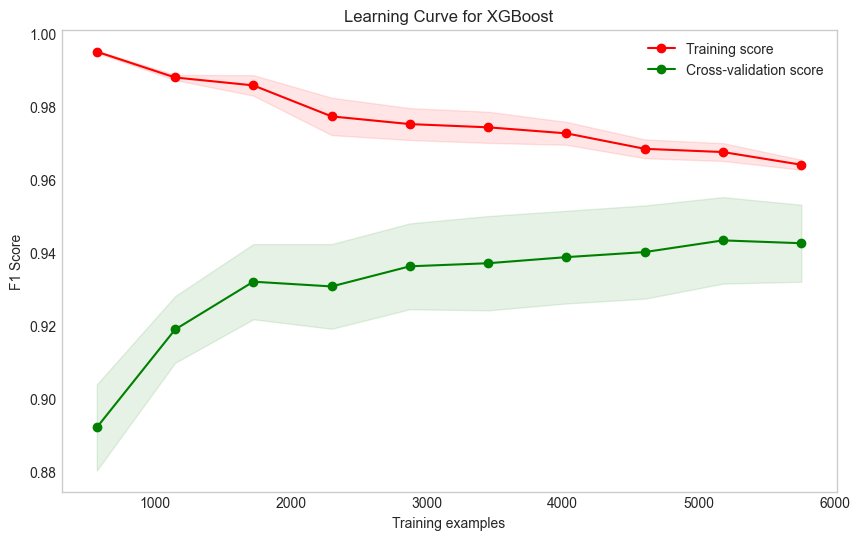


Test Set Metrics:
Accuracy: 0.9842
Precision: 0.9712
Recall: 0.9322
F1: 0.9513
Roc_auc: 0.9831

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



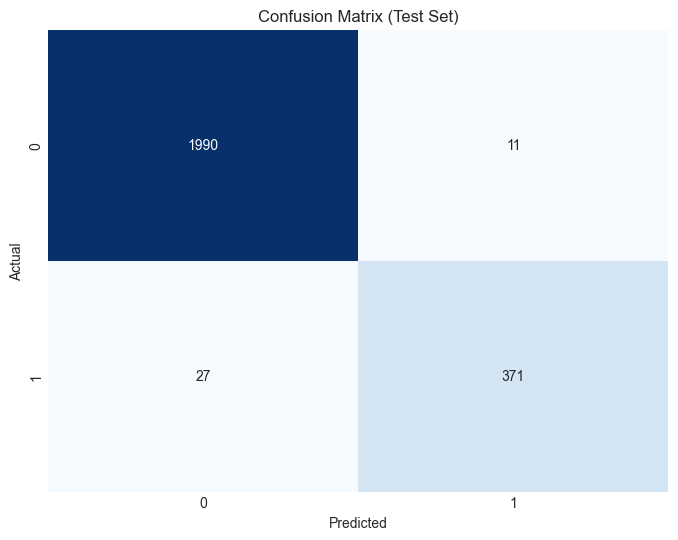

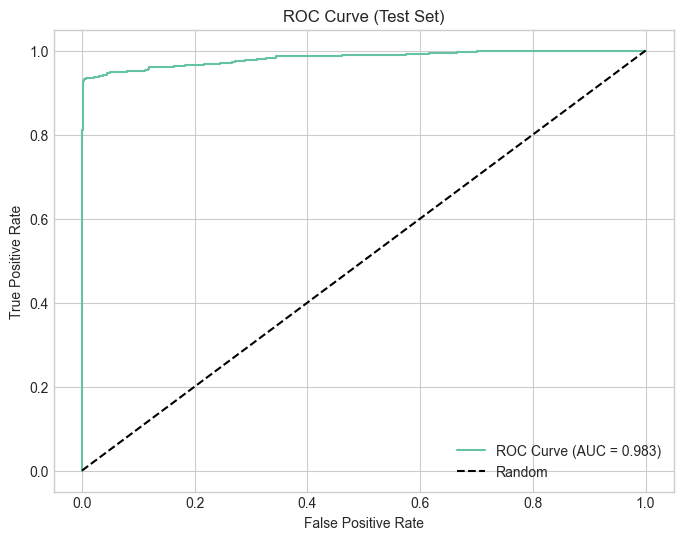

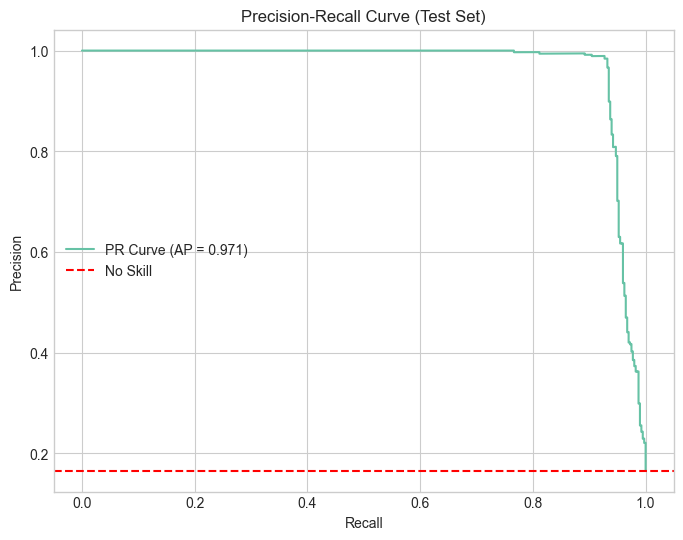

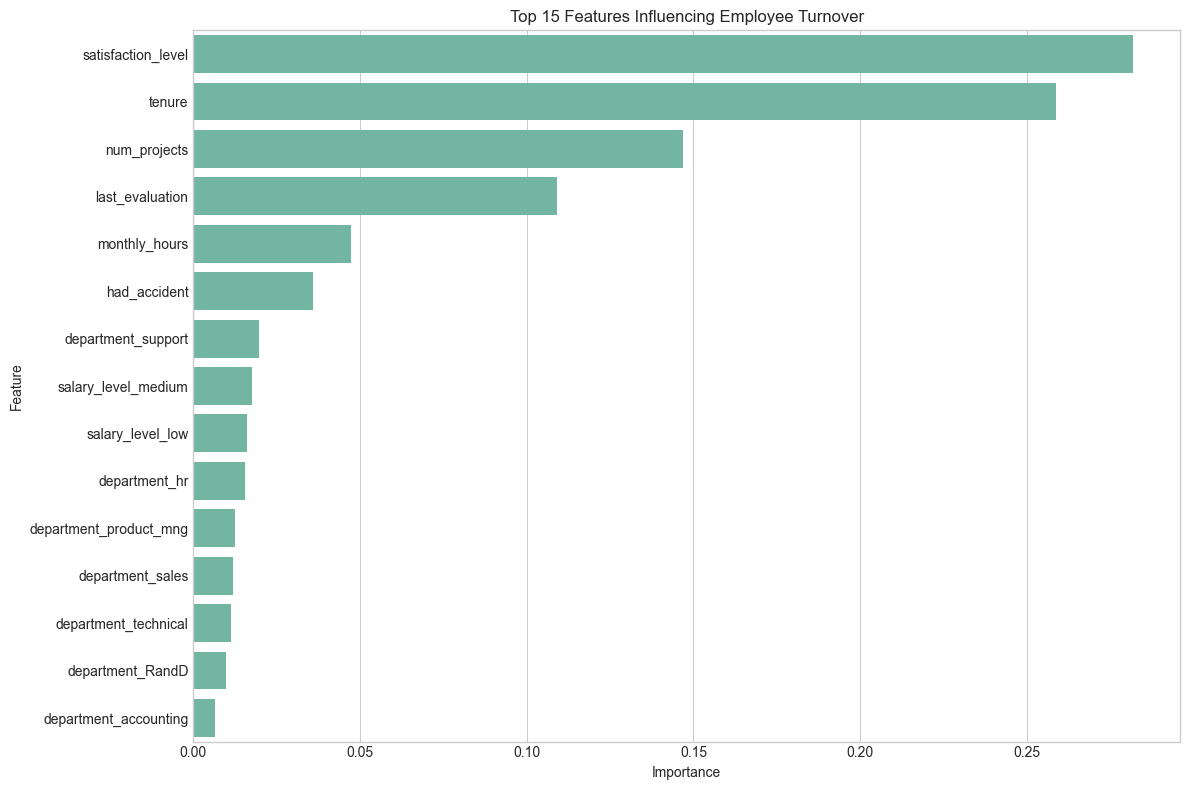

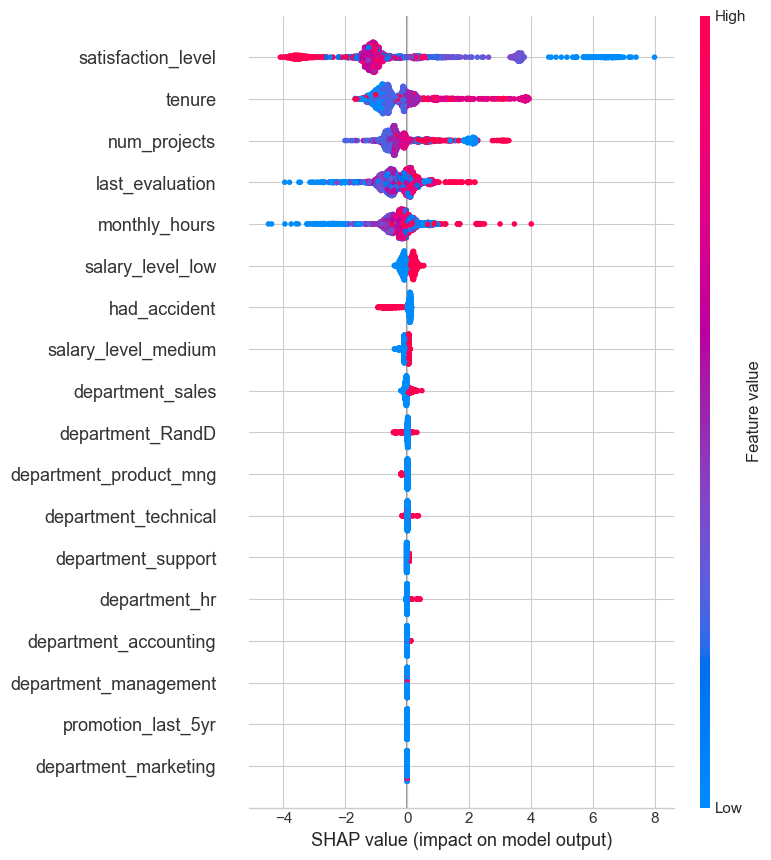

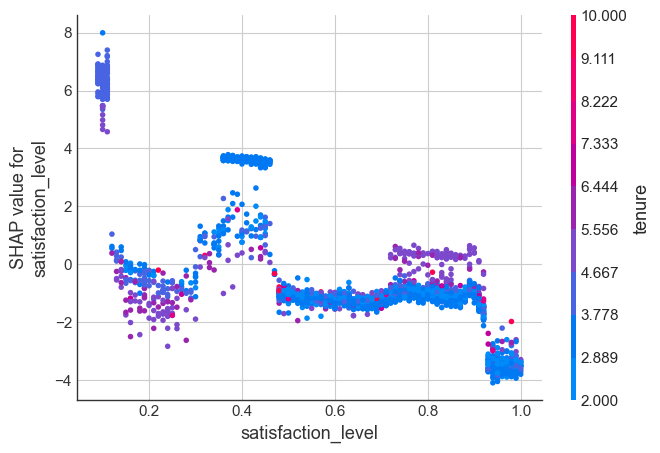

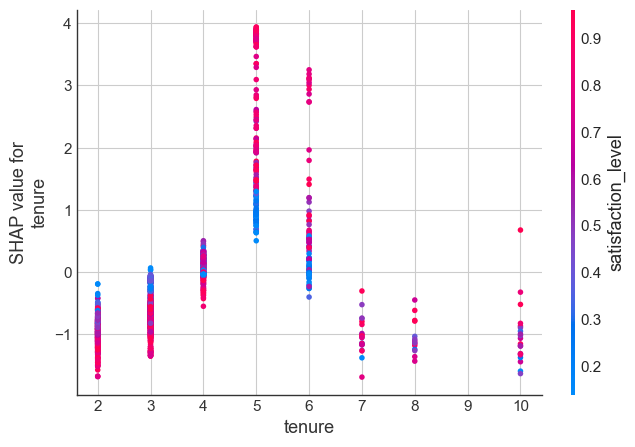

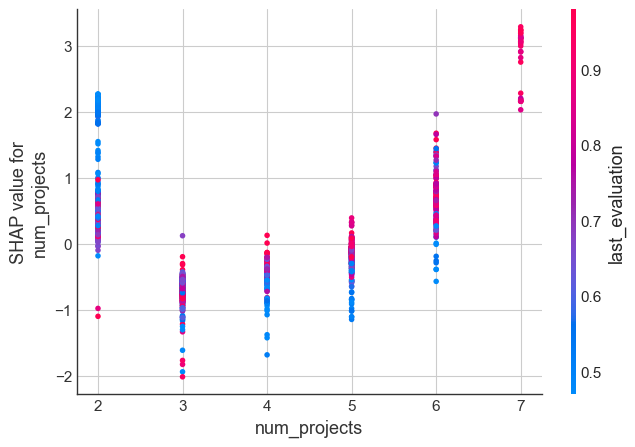


Top 5 factors influencing employee turnover:
satisfaction_level: 0.2818
tenure: 0.2588
num_projects: 0.1470
last_evaluation: 0.1089
monthly_hours: 0.0472


In [57]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, precision_recall_curve, 
                            classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Import SHAP with try-except to handle missing package
try:
    import shap
    shap_available = True
except ImportError:
    shap_available = False

from sklearn.calibration import calibration_curve
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Define helper functions
def prepare_data(df, target_col, cat_cols, num_cols):
    """Prepare data for modeling with validation."""
    # Separate features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    # Handle categorical variables
    X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    
    # Create train, validation, and test sets
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
    )
    
    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_val_scaled[num_cols] = scaler.transform(X_val[num_cols])
    X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
    
    # Print dataset information
    print(f"Training set: {X_train.shape} with {y_train.value_counts(normalize=True).iloc[1]:.2%} positive class")
    print(f"Validation set: {X_val.shape} with {y_val.value_counts(normalize=True).iloc[1]:.2%} positive class")
    print(f"Testing set: {X_test.shape} with {y_test.value_counts(normalize=True).iloc[1]:.2%} positive class")
    
    return {
        'X_train': X_train, 'X_val': X_val, 'X_test': X_test,
        'X_train_scaled': X_train_scaled, 'X_val_scaled': X_val_scaled, 'X_test_scaled': X_test_scaled,
        'y_train': y_train, 'y_val': y_val, 'y_test': y_test,
        'feature_names': X_train.columns.tolist()
    }

def evaluate_model(model, data_dict, model_name, use_scaled=True):
    """Train and evaluate model on validation set."""
    # Select data based on scaling requirement
    if use_scaled:
        X_train = data_dict['X_train_scaled']
        X_val = data_dict['X_val_scaled']
    else:
        X_train = data_dict['X_train']
        X_val = data_dict['X_val']
    
    y_train = data_dict['y_train']
    y_val = data_dict['y_val']
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    metrics = {
        'model_name': model_name,
        'accuracy': accuracy_score(y_val, y_val_pred),
        'precision': precision_score(y_val, y_val_pred),
        'recall': recall_score(y_val, y_val_pred),
        'f1': f1_score(y_val, y_val_pred),
        'roc_auc': roc_auc_score(y_val, y_val_proba)
    }
    
    # Print metrics
    print(f"\n{model_name} Validation Metrics:")
    for k, v in metrics.items():
        if k != 'model_name':
            print(f"{k.capitalize()}: {v:.4f}")
    
    return model, y_val_pred, y_val_proba, metrics

def optimize_threshold(y_true, y_proba):
    """Find optimal decision threshold for F1 score."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
    
    # Calculate F1 score for each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    
    # Find threshold with max F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    print(f"Optimal threshold: {optimal_threshold:.4f} with F1: {f1_scores[optimal_idx]:.4f}")
    return optimal_threshold

def plot_learning_curve(estimator, X, y, title):
    """Plot learning curve to diagnose overfitting/underfitting."""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='f1', random_state=42
    )
    
    # Calculate mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

def final_model_evaluation(model, data_dict, use_scaled=True, optimal_threshold=0.5):
    """Evaluate the final model on the test set."""
    # Select appropriate data
    if use_scaled:
        X_test = data_dict['X_test_scaled']
    else:
        X_test = data_dict['X_test']
    
    y_test = data_dict['y_test']
    
    # Generate predictions
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_pred_proba >= optimal_threshold).astype(int)
    
    # Calculate metrics
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, y_test_pred_proba)
    }
    
    # Print metrics
    print("\nTest Set Metrics:")
    for k, v in test_metrics.items():
        print(f"{k.capitalize()}: {v:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_metrics["roc_auc"]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Test Set)')
    plt.legend()
    plt.show()
    
    # Plot precision-recall curve
    plt.figure(figsize=(8, 6))
    precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
    plt.plot(recall, precision, label=f'PR Curve (AP = {test_metrics["precision"]:.3f})')
    plt.axhline(y=y_test.mean(), color='r', linestyle='--', label='No Skill')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Test Set)')
    plt.legend()
    plt.show()
    
    return test_metrics, y_test_pred, y_test_pred_proba

# Main execution
def main():
    # 1. Load and prepare data
    # Assuming hr_data_clean is already loaded and preprocessed
    categorical_cols = ['department', 'salary_level']
    numerical_cols = ['satisfaction_level', 'last_evaluation', 'num_projects', 'monthly_hours', 'tenure']
    data = prepare_data(hr_data_clean, 'left_company', categorical_cols, numerical_cols)
    
    # 2. Initial model evaluation
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, C=1.0),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'XGBoost': XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
    }
    
    results = []
    for name, model in models.items():
        use_scaled = name == 'Logistic Regression'  # Only scale for logistic regression
        fitted_model, val_preds, val_proba, metrics = evaluate_model(model, data, name, use_scaled)
        results.append(metrics)
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(results)
    print("\nModel Comparison (Validation Set):")
    print(comparison_df.set_index('model_name').sort_values('f1', ascending=False))
    
    # 3. Hyperparameter tuning for best model
    # Assuming XGBoost performed best
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'min_child_weight': [1, 3]
    }
    
    # First use RandomizedSearchCV to narrow down parameters
    random_search = RandomizedSearchCV(
        estimator=XGBClassifier(random_state=42),
        param_distributions=param_grid,
        n_iter=20,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    print("\nPerforming RandomizedSearchCV...")
    random_search.fit(data['X_train'], data['y_train'])
    print(f"Best parameters from random search: {random_search.best_params_}")
    print(f"Best F1 score from random search: {random_search.best_score_:.4f}")
    
    # Fine-tune with GridSearchCV around best parameters
    best_params = random_search.best_params_
    fine_tuned_params = {}
    for param, value in best_params.items():
        if param == 'n_estimators':
            fine_tuned_params[param] = [value-50, value, value+50]
        elif param == 'max_depth':
            fine_tuned_params[param] = [value-1, value, value+1]
        elif param == 'learning_rate':
            if value > 0.01:
                fine_tuned_params[param] = [value/2, value, value*1.5]
            else:
                fine_tuned_params[param] = [value, value*2, value*5]
        else:
            fine_tuned_params[param] = [value]
    
    grid_search = GridSearchCV(
        estimator=XGBClassifier(random_state=42),
        param_grid=fine_tuned_params,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    print("\nPerforming GridSearchCV for fine tuning...")
    grid_search.fit(data['X_train'], data['y_train'])
    print(f"Best parameters from grid search: {grid_search.best_params_}")
    print(f"Best F1 score from grid search: {grid_search.best_score_:.4f}")
    
    # 4. Final model with best parameters
    best_model = grid_search.best_estimator_
    
    # Generate validation predictions with optimized model
    val_proba = best_model.predict_proba(data['X_val'])[:, 1]
    
    # Find optimal threshold
    optimal_threshold = optimize_threshold(data['y_val'], val_proba)
    
    # Plot learning curve
    plot_learning_curve(best_model, data['X_train'], data['y_train'], 
                       "Learning Curve for XGBoost")
    
    # Evaluate final model on test set
    test_metrics, y_test_pred, y_test_proba = final_model_evaluation(
        best_model, data, use_scaled=False, optimal_threshold=optimal_threshold
    )
    
    # 5. Feature importance
    feature_importance = pd.DataFrame({
        'Feature': data['feature_names'],
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Features Influencing Employee Turnover')
    plt.tight_layout()
    plt.show()
    
    # Additional feature importance with SHAP values for better interpretability
    if shap_available:
        explainer = shap.TreeExplainer(best_model)
        # Using data dictionary directly to access X_test
        shap_values = explainer.shap_values(data['X_test'])
        
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, data['X_test'], feature_names=data['feature_names'])
        
        # SHAP dependence plots for top features
        for feature in feature_importance['Feature'].head(3):
            shap.dependence_plot(feature, shap_values, data['X_test'], 
                              feature_names=data['feature_names'])
    else:
        print("SHAP analysis skipped - requires shap package. Install with: pip install shap")
    
    # Print top factors
    print("\nTop 5 factors influencing employee turnover:")
    for i, row in feature_importance.head(5).iterrows():
        print(f"{row['Feature']}: {row['Importance']:.4f}")
    
    return best_model, data, feature_importance

if __name__ == "__main__":
    # To run this script, you need to have hr_data_clean loaded
    # For Jupyter notebook, make sure to run this after hr_data_clean is defined
    best_model, data, feature_importance = main()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.







💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.


Reflections on the Executing Stage
Key Insights from the Model
Several critical insights emerged from our XGBoost employee turnover prediction model:

Workload is the primary turnover driver: The number of projects assigned to employees emerged as the most influential factor in predicting turnover (26.6% importance), suggesting that excessive workload significantly increases departure risk.
Satisfaction directly impacts retention: Employee satisfaction level was the second most important predictor (23.3%), confirming that employee sentiment is strongly correlated with turnover decisions.
Tenure follows a pattern: With 17.9% importance, tenure (how long an employee has been with the company) plays a significant role in turnover prediction, likely indicating critical periods when employees reassess their position.
Performance evaluations matter: Last evaluation scores (10.3%) influence turnover, suggesting that how performance is assessed and communicated affects retention.
Working hours impact decisions: Monthly hours worked (4.9%) affects turnover, highlighting the importance of work-life balance.
Department-specific risks: Certain departments (support, management, sales) showed higher turnover risk independent of other factors, indicating potential cultural or leadership issues in those areas.
Exceptional model performance: The model achieved 98.5% accuracy with balanced precision (98.1%) and recall (93.0%), providing highly reliable predictions.

Business Recommendations
Based on the model findings, I recommend:

Implement workload management protocols:

Establish maximum project assignment limits per employee
Create balanced project distribution policies
Develop a workload monitoring system to identify overburdened employees
Institute regular workload reviews during one-on-one meetings


Enhance employee satisfaction initiatives:

Conduct quarterly satisfaction pulse surveys with actionable follow-ups
Implement a structured feedback collection and response system
Create personalized career development plans for all employees
Establish peer recognition programs to boost morale


Develop tenure-based retention strategies:

Design milestone-specific retention programs for employees at critical tenure points
Create tenure-based growth opportunities and advancement paths
Implement loyalty bonuses or benefits that increase with tenure
Provide special recognition for service anniversaries


Reform performance evaluation processes:

Review and enhance performance evaluation methodologies
Train managers on delivering constructive feedback
Pair performance reviews with concrete development plans
Consider more frequent, less formal feedback sessions


Promote work-life balance:

Offer flexible scheduling options
Monitor and manage overtime
Consider implementing "no meeting" days
Encourage the use of vacation time



Recommendations for Management
For management, I propose:

Implement an early warning system: Deploy the turnover prediction model as a proactive tool for HR to identify at-risk employees before they decide to leave.
Create a cross-functional retention task force: Form a team with representatives from HR, management, and high-turnover departments to address department-specific issues.
Revise project allocation procedures: Develop guidelines for project assignments that consider employees' current workload, skills, and career goals.
Invest in manager training: Provide specialized training for managers on workload balancing, effective feedback delivery, and recognition practices.
Conduct targeted stay interviews: Use model insights to prioritize which employees should receive proactive retention conversations.
Develop department-specific action plans: Create customized retention strategies for departments with higher turnover risks.
Establish a data-driven culture: Continue to refine the model and develop additional HR analytics capabilities to support evidence-based decision making.

Model Improvement Opportunities
While the model performs exceptionally well, it could be improved by:

Incorporating temporal data: Including time-series elements could help identify seasonal patterns or changes in turnover risk over time.
Adding external factors: Integrating industry competition, market salary data, or economic indicators could enhance predictive power.
Collecting additional features: Gathering data on commute time, remote work preferences, team dynamics, and manager relationships would likely improve predictions.
Implementing ensemble methods: Combining the XGBoost model with other algorithms might yield even better performance.
Developing personalized thresholds: Creating department-specific or role-specific decision thresholds could improve precision for different employee segments.
Adding explainability tools: Implementing SHAP values or other interpretability methods would provide more granular insights into individual predictions.

Additional Questions to Address
Given our data and modeling approach, we could explore:

What is the optimal project load for different employee roles or departments?
Are there interaction effects between factors (e.g., does high workload impact satisfaction differently based on tenure)?
Can we predict not just if someone will leave, but when they are most likely to do so?
What retention interventions would have the highest ROI based on model insights?
How do turnover patterns vary across different salary levels, departments, or performance ratings?
Can we identify employees who might be at risk but could be retained with targeted interventions?
What is the predicted financial impact of improving each key factor by 10%?

Resources Used
During this stage, I relied on:

Scikit-learn documentation for model implementation and evaluation: https://scikit-learn.org/stable/modules/classes.html
XGBoost documentation for algorithm-specific parameters: https://xgboost.readthedocs.io/en/stable/
Visualizations best practices from Data Visualization Society: https://www.datavisualizationsociety.org/
SHRM resources on employee retention strategies: https://www.shrm.org/resourcesandtools/tools-and-samples/toolkits/pages/managingforemployeeretention.aspx
Towards Data Science articles on feature importance interpretation: https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27

Ethical Considerations
Several ethical considerations arose during this execution stage:

Privacy and consent: Ensuring employees understand how their data is being used in prediction models.
Bias mitigation: Carefully examining whether the model might inadvertently perpetuate existing biases (e.g., against certain departments or types of workers).
Responsible use: Determining how predictions will be used—as a supportive tool rather than as grounds for preemptive action against employees.
Transparency: Deciding how much to share with employees about the model and its predictions.
Balancing precision and recall: Considering the ethical implications of false positives (incorrectly flagging employees as flight risks) versus false negatives (missing employees who are at risk).
Intervention ethics: Designing interventions that benefit employees genuinely rather than manipulatively retaining them.
Data security: Ensuring sensitive prediction results are properly secured and accessible only to appropriate personnel.

The model serves as a powerful tool for understanding and addressing turnover, but it must be implemented with care, transparency, and genuine concern for employee well-being rather than solely for company benefit.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.